In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##  Cancer Dataset

In [112]:
dataset1=pd.read_csv('gene_expression.csv')
dataset1

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [2]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [114]:
percent_nan = percent_missing(dataset1)
if len(percent_nan) == 0:
    print("No missing values for the cancer dataset!")
else:
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90);

No missing values for the cancer dataset!


In [115]:
dataset1['Gene One'].unique()

array([ 4.3,  2.5,  5.7,  6.1,  7.4,  3.4,  3.1,  6.3,  5.5,  7.7,  6.6,
        5.4,  5.2,  8.3,  4.2,  3. ,  4.9,  8.5,  7.2,  3.3,  9.3,  7.8,
        2.4,  6.4,  3.6,  4.6,  9.7,  5. ,  6.8,  5.9,  6.2,  6.7,  4.8,
        3.5,  6.9,  6.5,  2.7,  3.9,  8.4,  3.7,  4.1,  7.1,  2.6,  1.8,
        4.7,  8.9,  8.6,  7.6,  9.1,  4.5,  4. ,  7.3,  2.8,  2.9,  5.6,
        4.4,  7.5,  8.2,  9. ,  5.8,  3.2,  9.4,  2.2,  6. ,  5.3,  5.1,
        7. ,  8.8,  8.7,  2.3,  3.8,  7.9,  8.1,  9.2,  2. ,  9.5,  1.9,
        1.6,  8. ,  1.5,  2.1,  1.2,  1. ,  9.6,  1.7,  9.9, 10. ,  9.8,
        1.3])

In [116]:
dataset1['Gene Two'].unique()

array([ 3.9,  6.3,  6.2,  3.4,  7.5,  6.8,  4.9,  8.6,  3.5,  2.9,  4.5,
        7.2,  5.7,  5.4,  9.3,  7.7,  5.6,  4.2,  3.7,  5.3,  6.4,  5. ,
        6.9,  6.5,  4.8,  3.2,  6.1,  7.3,  5.1,  2.3,  4.1,  4.6,  7.8,
        2.5,  6. ,  6.6,  8.4,  8.8,  7.1,  4.7,  4. ,  3.8,  5.5,  2.4,
        4.3,  7. ,  3.6,  7.4,  2.1,  8.2,  3.3,  6.7,  7.6,  3.1,  9.1,
        8.5,  1.8,  5.9,  2.6,  4.4,  5.2,  2.8,  5.8,  3. ,  8.3,  7.9,
        2.7,  8.1,  9.4,  8. ,  2.2,  1.9,  1.2,  9. ,  8.7,  1. ,  1.4,
        1.6,  1.5,  9.2,  2. ,  1.7,  8.9,  9.8,  9.6,  9.5,  9.7, 10. ])

In [117]:
dataset1['Cancer Present'].unique()

array([1, 0])

Therefore, there are no missing values

### Feature scaling

In [118]:
X = dataset1.drop('Cancer Present',axis=1)
y = dataset1['Cancer Present']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [121]:
X_train.head()

,Gene One,Gene Two
9,7.7,3.5
141,2.4,6.5
321,4.9,7.5
805,7.6,2.7
890,3.5,8.2


In [122]:
max(X['Gene One'].unique())
min(X['Gene One'].unique())
# X.head()

1.0

In [123]:
scaled_X_train.min()

-2.5629975764300355

### Logistic Regression

In [124]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [125]:
log_model.coef_

array([[ 1.11718777, -2.3076671 ]])

In [4]:
from sklearn.metrics import classification_report,accuracy_score

In [127]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8466666666666667

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       136
           1       0.86      0.86      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### K-Nearest Neighbors (KNN)

In [5]:
from sklearn.neighbors import KNeighborsClassifier


In [130]:

test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

In [131]:
test_errors

[0.08999999999999997,
 0.09999999999999998,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.08333333333333337,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.06999999999999995,
 0.07666666666666666]

([<matplotlib.axis.XTick at 0x7f00488e92a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

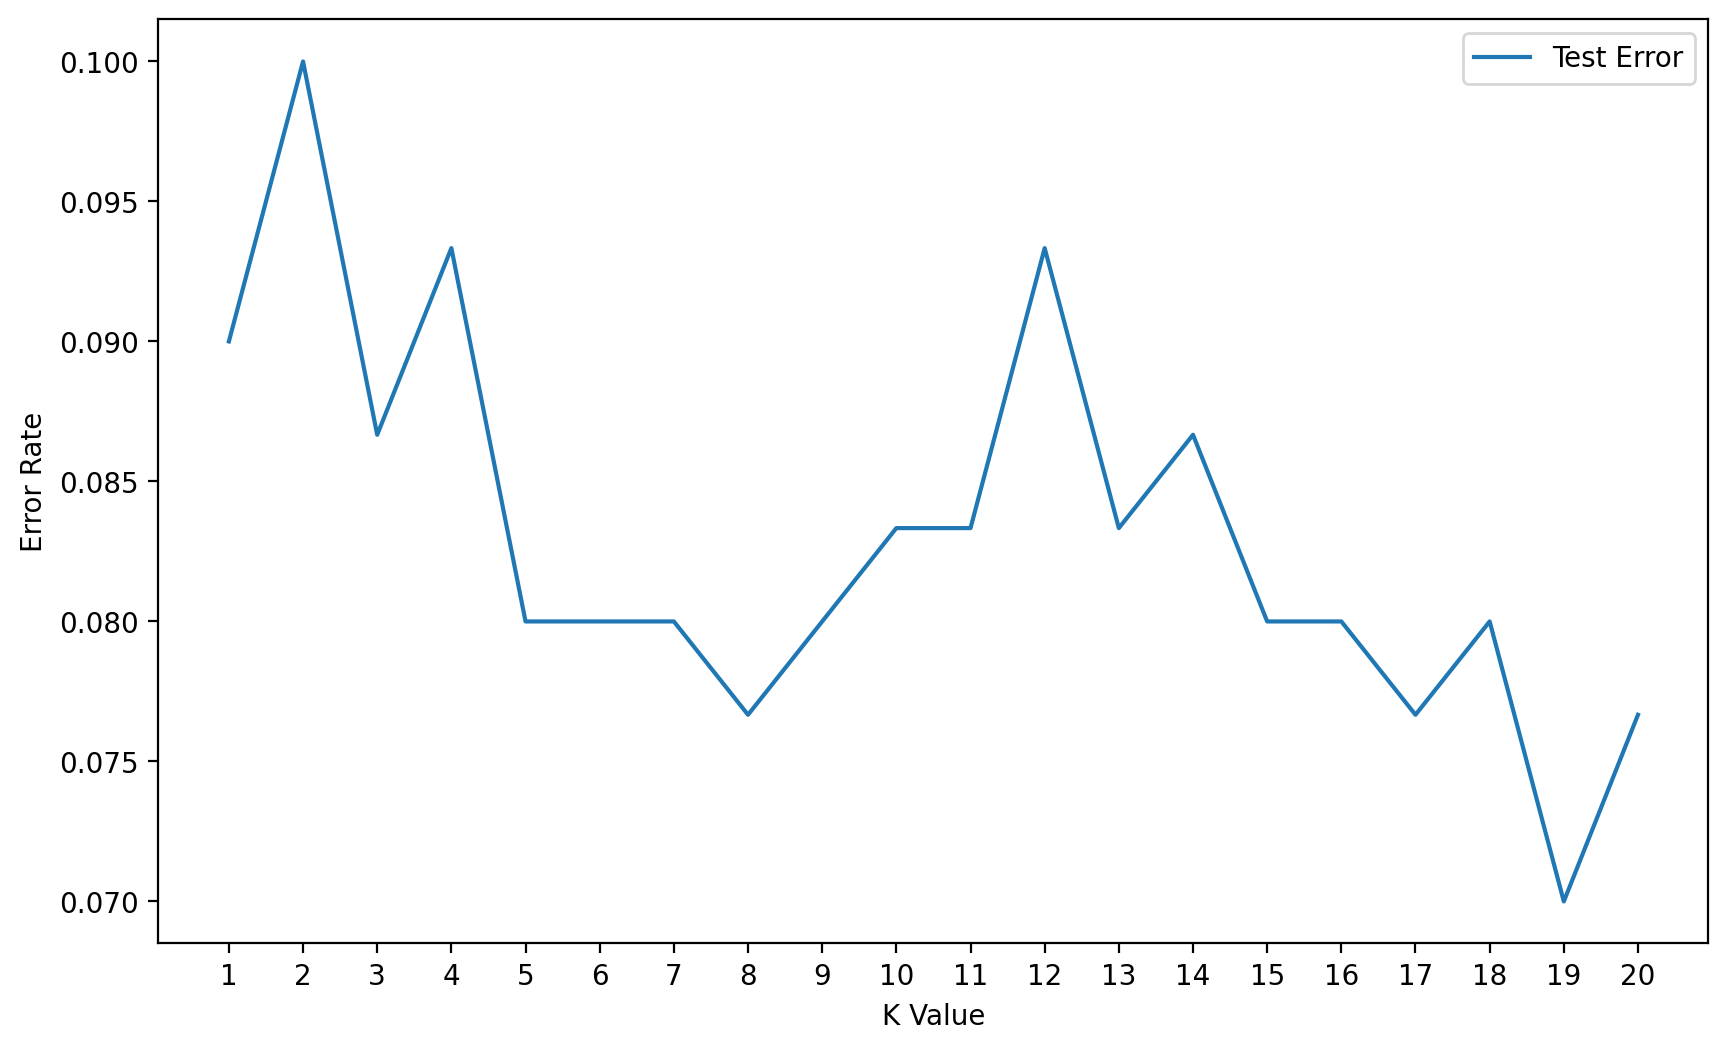

In [132]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

As can be seen here minimum error is at k=19 with error=0.073

In [133]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)

In [134]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       136
           1       0.93      0.94      0.94       164

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### Support Vectore Machine (SVM)

In [6]:
from sklearn.svm import SVC

In [136]:
svc_model = SVC(kernel='linear', C=100)
svc_model.fit(scaled_X_train, y_train)

SVC(C=100, kernel='linear')

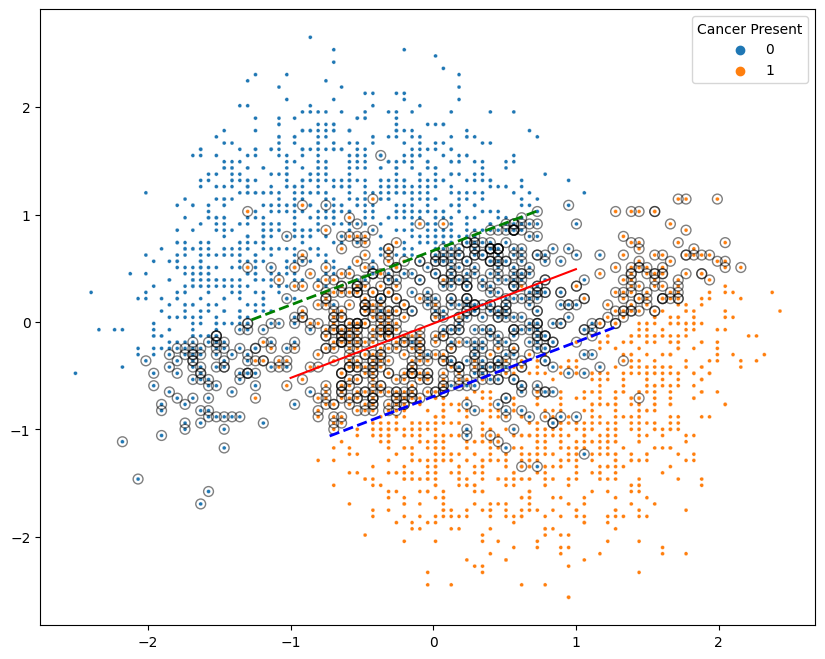

In [137]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=scaled_X_train[:,0],
                y=scaled_X_train[:,1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)

In [138]:
y_pred_svm=svc_model.predict(scaled_X_test)

In [139]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       136
           1       0.85      0.86      0.86       164

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [140]:
svm_model_rbf = SVC(kernel='rbf', C=100)
svm_model_rbf.fit(scaled_X_train, y_train)

SVC(C=100)

In [141]:
y_pred_svm_rbf = svm_model_rbf.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.94      0.93      0.93       164

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [142]:
svm_model_poly = SVC(kernel='poly', C=100,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

SVC(C=100, kernel='poly')

In [143]:
y_pred_svm_poly = svm_model_poly.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       136
           1       0.86      0.87      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.85      0.85      0.85       300



As can be seen, the evaluation metrics are highest when using rbf kernel, so it is the best SVM Model

As for the best from logistic, knn and svm, svm and knn withk=19 have the same accuracy and f1-score 93%, so any of them are valid

## Income Dataset

In [8]:
dataset2=pd.read_csv('train.csv')
dataset2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


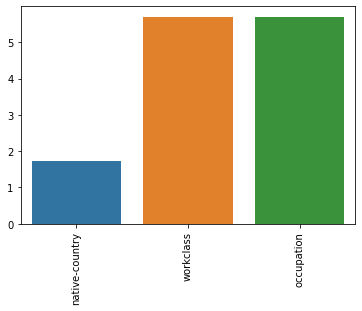

In [9]:
percent_nan = percent_missing(dataset2)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

In [10]:
dataset2['native-country'].fillna(value=dataset2['native-country'].mode()[0],inplace=True)

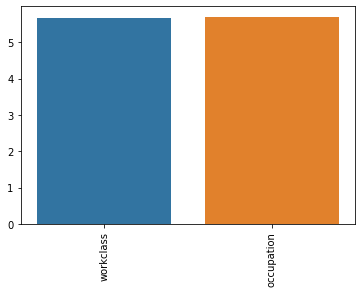

In [11]:
percent_nan = percent_missing(dataset2)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

Observation: whenever there are missing values in work class, the value of the occupation is also missing.
So it's better to drop the rows rather than imputing them

In [12]:
dataset_cleaned=dataset2.dropna(axis=0)
dataset_cleaned.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [14]:
percent_nan = percent_missing(dataset_cleaned)
if len(percent_nan) == 0:
    print("No missing values for the income dataset!")
else:
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90);

No missing values for the income dataset!


In [15]:
df_nums=dataset_cleaned.select_dtypes(exclude='object')
df_objs = dataset_cleaned.select_dtypes(include='object')

In [16]:
from sklearn import preprocessing

In [17]:


label_encoder=preprocessing.LabelEncoder()
df_objs['education']=label_encoder.fit_transform(df_objs['education'])
df_objs['occupation']=label_encoder.fit_transform(df_objs['occupation'])
df_objs['workclass']=label_encoder.fit_transform(df_objs['workclass'])
df_objs['marital-status']=label_encoder.fit_transform(df_objs['marital-status'])
df_objs['native-country']=label_encoder.fit_transform(df_objs['native-country'])
df_objs['gender']=label_encoder.fit_transform(df_objs['gender'])


df_objs

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,2,10,0,3,Not-in-family,White,1,38
1,2,2,4,7,Own-child,White,1,38
2,2,9,2,3,Husband,White,1,38
3,5,5,2,13,Husband,White,1,38
4,5,15,4,7,Not-in-family,Black,1,38
...,...,...,...,...,...,...,...,...
43952,2,9,2,3,Husband,White,1,38
43953,2,11,4,7,Own-child,White,0,38
43954,2,15,0,11,Not-in-family,White,1,38
43955,2,9,4,11,Not-in-family,White,0,38


In [18]:

df_objs_final=pd.get_dummies(df_objs[['relationship','race']],drop_first=True)

df_objs_final.head()

,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0


In [19]:
df_objs.drop(columns=['relationship','race'],axis=1,inplace=True)
df_objs.head()

,workclass,education,marital-status,occupation,gender,native-country
0,2,10,0,3,1,38
1,2,2,4,7,1,38
2,2,9,2,3,1,38
3,5,5,2,13,1,38
4,5,15,4,7,1,38


In [20]:
final_df=pd.concat([df_nums,df_objs,df_objs_final],axis=1)
final_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass,education,marital-status,...,native-country,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,67,366425,16,99999,0,60,1,2,10,0,...,38,1,0,0,0,0,0,0,0,1
1,17,244602,8,0,0,15,0,2,2,4,...,38,0,0,1,0,0,0,0,0,1
2,31,174201,13,0,0,40,1,2,9,2,...,38,0,0,0,0,0,0,0,0,1
3,58,110199,4,0,0,40,0,5,5,2,...,38,0,0,0,0,0,0,0,0,1
4,25,149248,10,0,0,40,0,5,15,4,...,38,1,0,0,0,0,0,1,0,0


In [22]:
X = final_df.drop('income_>50K',axis=1)
y = final_df['income_>50K']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [24]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [25]:
y_pred = log_model.predict(scaled_X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3119
           1       0.70      0.56      0.62      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.74      0.76      4146
weighted avg       0.82      0.83      0.82      4146



### K-Nearest Neighbors (KNN)

In [27]:
test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

([<matplotlib.axis.XTick at 0x161e85e21c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

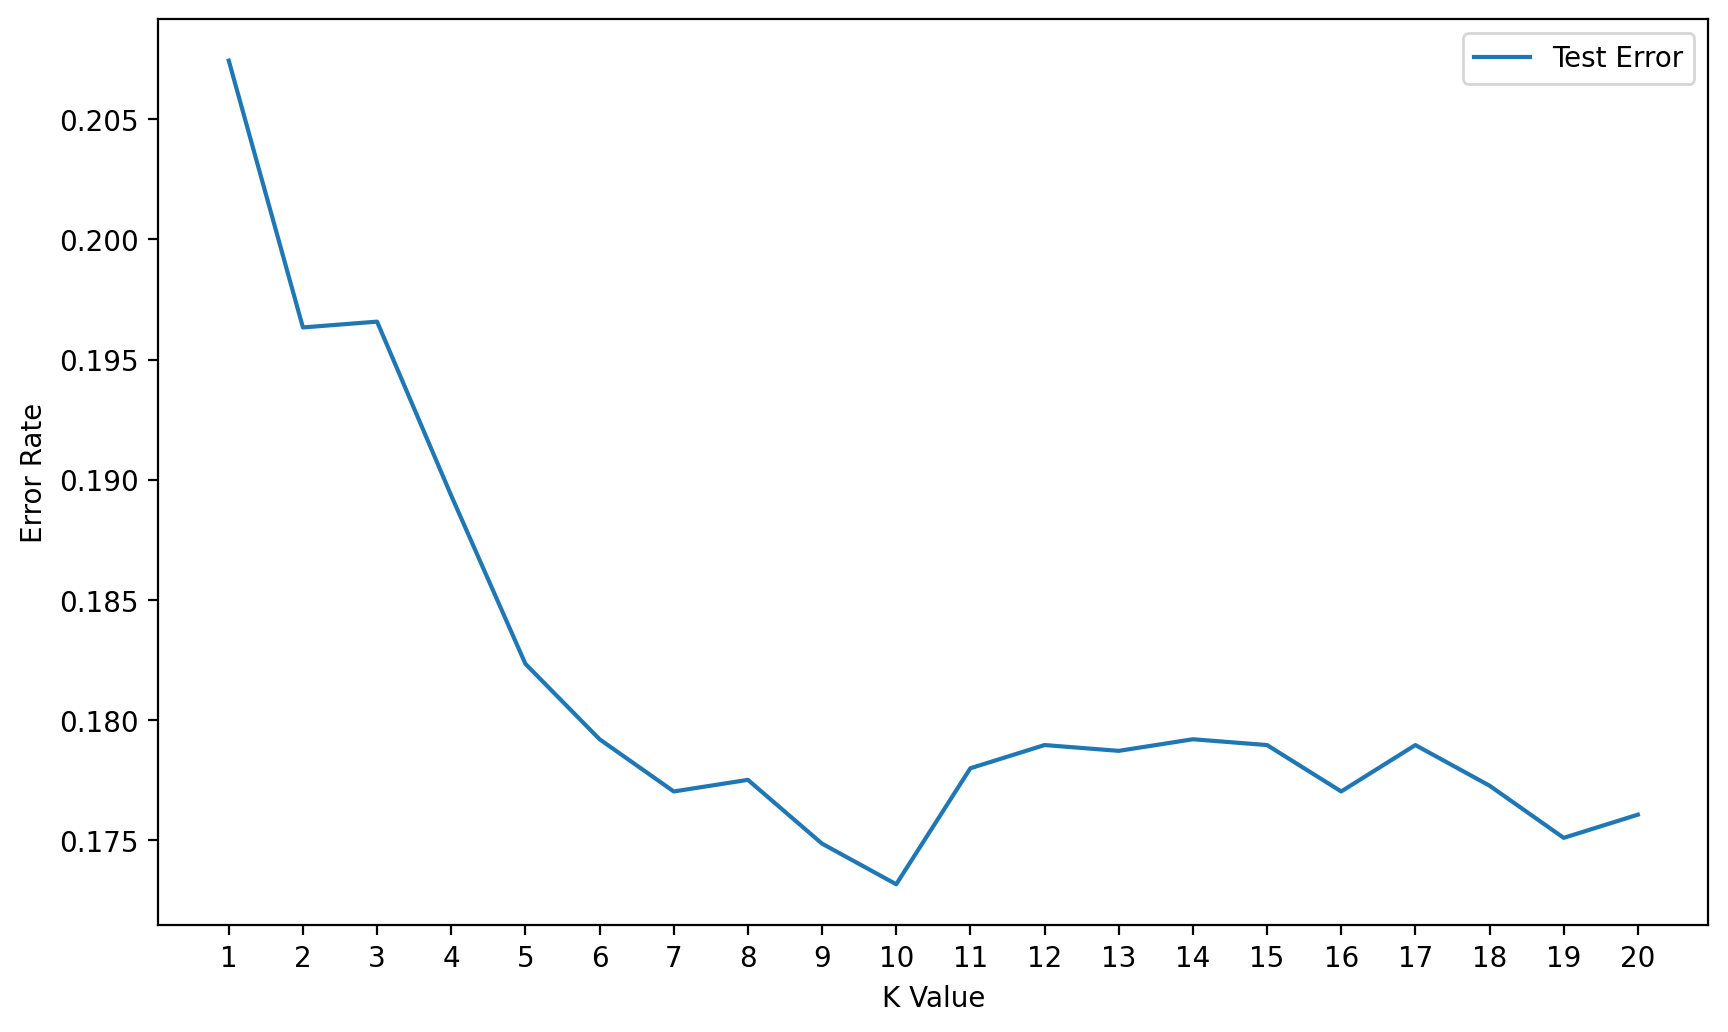

In [28]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

K =10 has the minimum error

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)

In [30]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3119
           1       0.70      0.52      0.60      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.72      0.74      4146
weighted avg       0.82      0.83      0.82      4146



### Support Vectore Machine (SVM)

In [31]:
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(scaled_X_train, y_train)

SVC(C=1, kernel='linear')

In [32]:
y_pred_svm=svc_model.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3119
           1       0.69      0.56      0.62      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.74      0.75      4146
weighted avg       0.82      0.83      0.82      4146



In [33]:
svm_model_rbf = SVC(kernel='rbf', C=1)
svm_model_rbf.fit(scaled_X_train, y_train)

SVC(C=1)

In [34]:
y_pred_svm_rbf=svm_model_rbf.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3119
           1       0.72      0.56      0.63      1027

    accuracy                           0.84      4146
   macro avg       0.79      0.74      0.76      4146
weighted avg       0.83      0.84      0.83      4146



In [39]:
svm_model_poly = SVC(kernel='poly', C=1,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

SVC(C=1, kernel='poly')

In [40]:
y_pred_svm_poly=svm_model_poly.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3119
           1       0.73      0.52      0.61      1027

    accuracy                           0.83      4146
   macro avg       0.80      0.73      0.75      4146
weighted avg       0.83      0.83      0.82      4146



## Heart Disease Dataset

In [2]:
pd.set_option('display.max_columns', None)
df_heart=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df_heart.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df_heart.shape

(253680, 22)

#### Downsampling due to high computation needed for model fitting.

In [4]:
n = 200000
df_heart = df_heart.head(-n)

### handling missing values

In [5]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [6]:
percent_nan = percent_missing(df_heart)
if len(percent_nan) == 0:
    print("No missing values for the heart disease dataset!")
else:
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90);

No missing values for the heart disease dataset!


### Feature scaling

All features are numerical, so no encoding is necessary. 
We will normalize the features.

In [7]:
df_nums=df_heart.select_dtypes(exclude='object')
df_objs = df_heart.select_dtypes(include='object')
df_nums.columns, type(df_objs.columns)

(Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
        'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'],
       dtype='object'),
 pandas.core.indexes.base.Index)

In [8]:
X = df_heart.drop('HeartDiseaseorAttack',axis=1)
y = df_heart['HeartDiseaseorAttack']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [11]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [12]:
log_model.coef_

array([[ 0.27677992,  0.29457642,  0.07224582,  0.02620641,  0.1628003 ,
         0.22337044,  0.08236567,  0.01422341,  0.00313017,  0.02597691,
        -0.05652923,  0.03487518,  0.09115075,  0.48157845,  0.06486972,
        -0.00614845,  0.1083618 ,  0.36262706,  0.77875767,  0.0221822 ,
        -0.07905002]])

In [13]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score

In [14]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.9064828614008942

In [41]:
def create_logistic_statistic(y_test, y_pred_test):
    accuracy = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    dict = {"type":"logistic", "accuracy_score": accuracy, "f1_score": f1, "precision_score": precision, "recall_score": recall}
    return dict

In [42]:
cols = ["type", "accuracy_score", "f1_score", "precision_score", "recall_score"]
df_logistic_stats = pd.DataFrame([], columns=cols)
y_pred_test = log_model.predict(scaled_X_test)
new_row = create_logistic_statistic(y_test, y_pred_test)
df_logistic_stats = pd.concat([df_logistic_stats, pd.DataFrame.from_records([new_row])])
df_logistic_stats

,type,accuracy_score,f1_score,precision_score,recall_score
0,logistic,0.906483,0.154882,0.455446,0.093306


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      4875
         1.0       0.46      0.09      0.15       493

    accuracy                           0.91      5368
   macro avg       0.69      0.54      0.55      5368
weighted avg       0.87      0.91      0.88      5368



### K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score

In [17]:
test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

In [18]:
test_errors

[0.1417660208643815,
 0.10245901639344257,
 0.11307749627421759,
 0.09724292101341281,
 0.10134128166915057,
 0.09463487332339793,
 0.09780178837555886,
 0.09388971684053649,
 0.09556631892697465,
 0.0925856929955291,
 0.09482116244411332,
 0.0925856929955291,
 0.09407600596125187,
 0.09202682563338305,
 0.0925856929955291,
 0.09221311475409832,
 0.09239940387481371,
 0.09165424739195227,
 0.0925856929955291,
 0.0912816691505216]

([<matplotlib.axis.XTick at 0x7f3101c06290>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

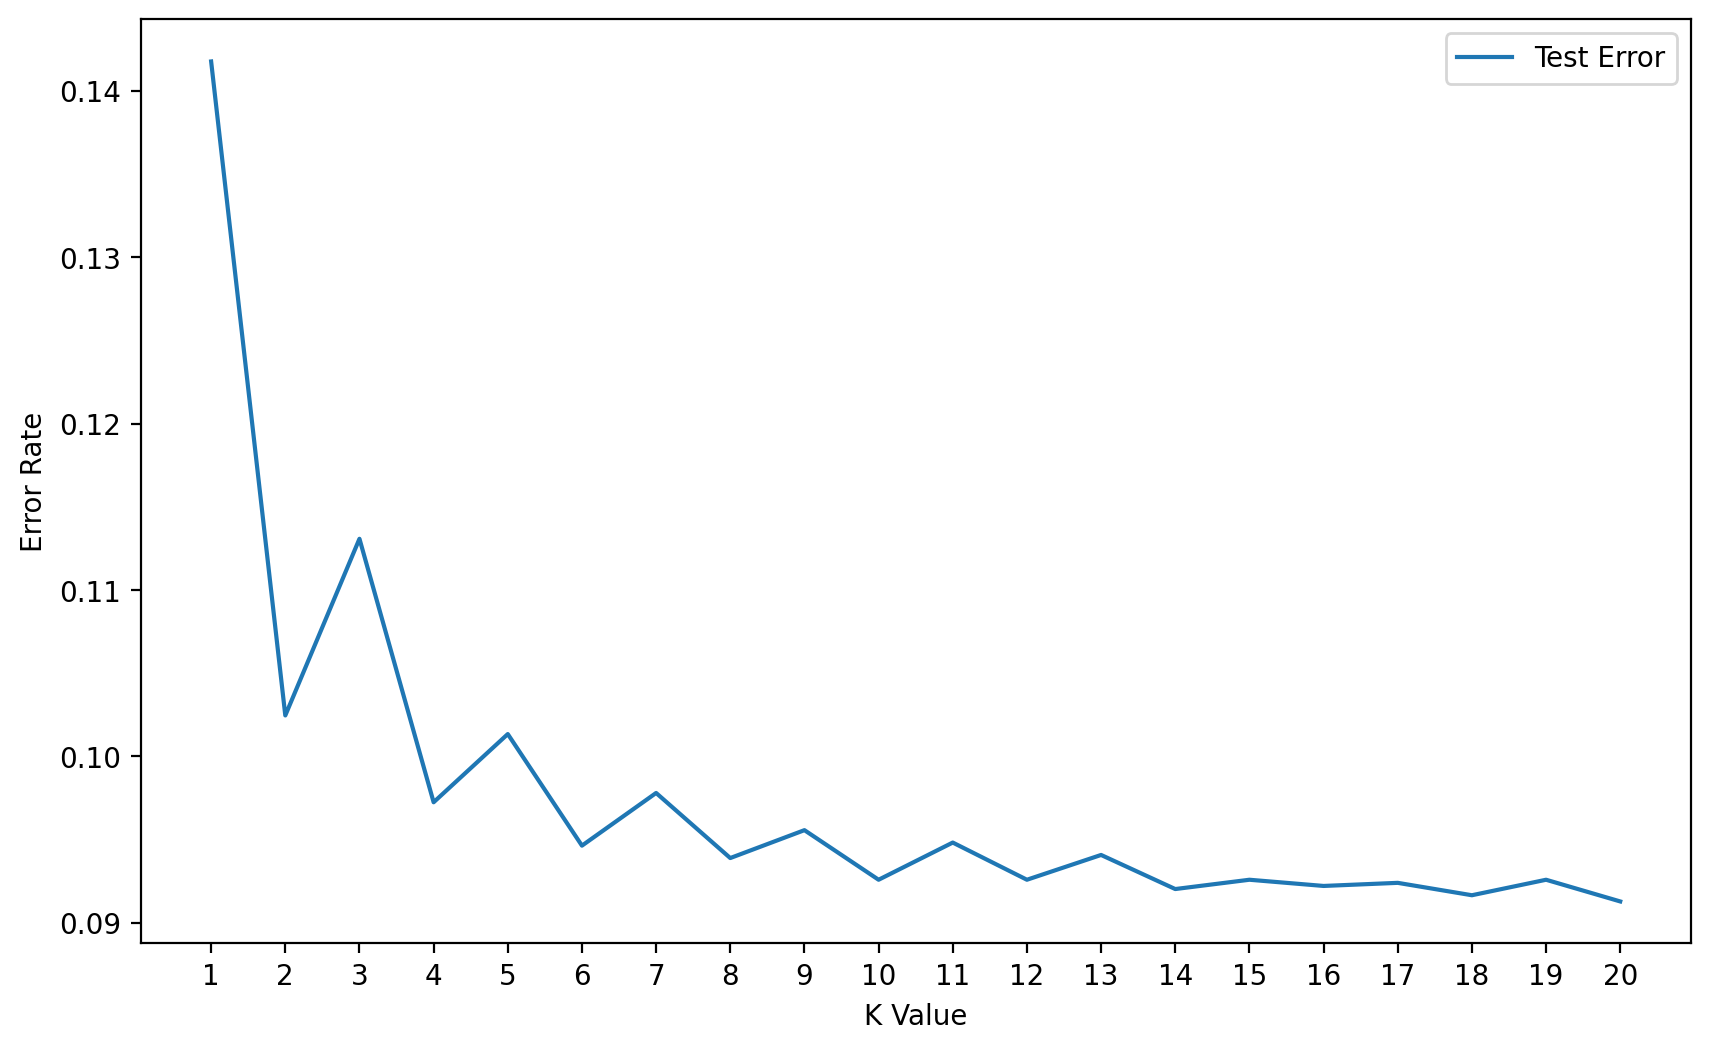

In [19]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

In [43]:
def create_statistic(y_test, y_pred_test, n):
    accuracy = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    dict = {"type":f"knn_{n}", "accuracy_score": accuracy, "f1_score": f1, "precision_score": precision, "recall_score": recall}
    return dict

#### I will consider n-values starting 10 until 20 as it can be seen in the plot. This is to see whether a higher complexity(aka n-value would show significant increase in the investigated metrics.

In [44]:
cols = ["type", "accuracy_score", "f1_score", "precision_score", "recall_score"]
df_knn_stats = pd.DataFrame([], columns=cols)
for n in range(10, 21):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    new_row = create_statistic(y_test, y_pred_test, n)
    df_knn_stats = pd.concat([df_knn_stats, pd.DataFrame.from_records([new_row])])

df_knn_stats

,type,accuracy_score,f1_score,precision_score,recall_score
0,knn_10,0.907414,0.120354,0.472222,0.068966
0,knn_11,0.905179,0.138748,0.418367,0.083164
0,knn_12,0.907414,0.104505,0.467742,0.058824
0,knn_13,0.905924,0.124783,0.428571,0.073022
0,knn_14,0.907973,0.098540,0.490909,0.054767
0,knn_15,0.907414,0.123457,0.472973,0.070994
0,knn_16,0.907787,0.098361,0.482143,0.054767
0,knn_17,0.907601,0.117438,0.478261,0.066937
0,knn_18,0.908346,0.085502,0.511111,0.046653
0,knn_19,0.907414,0.107720,0.468750,0.060852


### Support Vectore Machine (SVM)

In [22]:
from sklearn.svm import SVC

In [60]:
def create_svm_statistic(y_test, y_pred_test, kernel):
    accuracy = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    dict = {"type":f"svm_{kernel}", "accuracy_score": accuracy, "f1_score": f1, "precision_score": precision, "recall_score": recall}
    return dict

In [24]:
cols = ["kernel", "accuracy_score", "f1_score", "precision_score", "recall_score"]
df_svm_stats = pd.DataFrame([], columns=cols)

In [25]:
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(scaled_X_train, y_train)

SVC(C=1, kernel='linear')

In [26]:
y_pred_svm=svc_model.predict(scaled_X_test)

In [27]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4875
         1.0       0.00      0.00      0.00       493

    accuracy                           0.91      5368
   macro avg       0.45      0.50      0.48      5368
weighted avg       0.82      0.91      0.86      5368



/home/husseljo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/husseljo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/husseljo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
svc_model_rbf = SVC(kernel='rbf', C=1)
svc_model_rbf.fit(scaled_X_train, y_train)


SVC(C=1)

In [30]:
y_pred_svm_rbf=svc_model_rbf.predict(scaled_X_test)

In [31]:
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4875
         1.0       0.55      0.05      0.09       493

    accuracy                           0.91      5368
   macro avg       0.73      0.52      0.52      5368
weighted avg       0.88      0.91      0.87      5368



In [32]:
svm_model_poly = SVC(kernel='poly', C=1,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

SVC(C=1, kernel='poly')

In [33]:
y_pred_svm_poly=svm_model_poly.predict(scaled_X_test)

In [61]:
cols = ["type", "accuracy_score", "f1_score", "precision_score", "recall_score"]
df_svm_stats = pd.DataFrame([], columns=cols)
types = [(y_pred_svm, "linear"), (y_pred_svm_rbf, "rbf"), (y_pred_svm_poly, "poly_deg=3")]

for y_pred, t in types:
    new_row = create_svm_statistic(y_test, y_pred, t)
    df_svm_stats = pd.concat([df_svm_stats, pd.DataFrame.from_records([new_row])])
df_svm_stats

/home/husseljo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,type,accuracy_score,f1_score,precision_score,recall_score
0,svm_linear,0.908159,0.000000,0.000000,0.000000
0,svm_rbf,0.908905,0.085981,0.547619,0.046653
0,svm_poly_deg=3,0.907787,0.104882,0.483333,0.058824


In [62]:
df_all_stats =  pd.concat([df_knn_stats, df_logistic_stats, df_svm_stats])
df_all_stats

,type,accuracy_score,f1_score,precision_score,recall_score
0,knn_10,0.907414,0.120354,0.472222,0.068966
0,knn_11,0.905179,0.138748,0.418367,0.083164
0,knn_12,0.907414,0.104505,0.467742,0.058824
0,knn_13,0.905924,0.124783,0.428571,0.073022
0,knn_14,0.907973,0.098540,0.490909,0.054767
0,knn_15,0.907414,0.123457,0.472973,0.070994
0,knn_16,0.907787,0.098361,0.482143,0.054767
0,knn_17,0.907601,0.117438,0.478261,0.066937
0,knn_18,0.908346,0.085502,0.511111,0.046653
0,knn_19,0.907414,0.107720,0.468750,0.060852
